# Setup

In [1]:
import numpy as np
import matplotlib as mpl

from pathlib import Path
from matplotlib import pyplot as plt

## Fonts

In [2]:
from matplotlib import font_manager

_FONT_PATHS = [
  # '/home/broxoli/projects/doi-ml/fonts/Roboto/',
  # '/home/broxoli/projects/doi-ml/fonts/Noto_Sans/',
  # '/home/broxoli/projects/doi-ml/fonts/Poppins/'
]

def import_fonts(font_path: str) -> None:
  """Import fonts stored locally for use in Colab.

  Args:
    font_path: Path to either a directory that contains .ttf fonts or to a 
      specific .ttf font file.
  """
  if Path(font_path).exists():
    font_files = font_manager.findSystemFonts(fontpaths=font_path)
  else:
    # Assume the path points to a file if it's not a directory.
    font_files = [font_path]

  # Add fonts to default font manager.
  for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

def import_default_fonts() -> None:
  """Register a set of default fonts with Matplotlib."""
  for font_path in _FONT_PATHS:
    import_fonts(font_path)

import cycler
import matplotlib as mpl
import matplotlib_inline as mpl_inline

def set_default_styles(retina: bool = True) -> None:
  FIGURE_DPI = 288
  DEFAULT_CMAP = 'Set2'
  TEXT_COLOR = '#444444'
  TICK_COLOR = '#666666'

  def set_retina():
    # ipy.display.set_matplotlib_formats('retina')
    mpl_inline.backend_inline.set_matplotlib_formats('retina')
    return FIGURE_DPI // 2

  dpi = set_retina() if retina else FIGURE_DPI
  mpl_styles = {
      'axes.prop_cycle': cycler.cycler('color', mpl.cm.get_cmap(DEFAULT_CMAP).colors),
      'axes.edgecolor': TICK_COLOR,
      'axes.labelcolor': TEXT_COLOR,
      # 'font.family': ['Poppins', 'Noto Sans', 'Roboto'],
      'text.color': TEXT_COLOR,
      'xtick.color': TICK_COLOR,
      'ytick.color': TICK_COLOR,
      'grid.color': '#EEEEEE',
      'grid.linewidth': 0.4,
      'figure.dpi': dpi,
      'savefig.dpi': dpi,
  }

  mpl.rcParams.update(mpl_styles)
  
set_default_styles()

## Image Transformations [Chapter 3]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


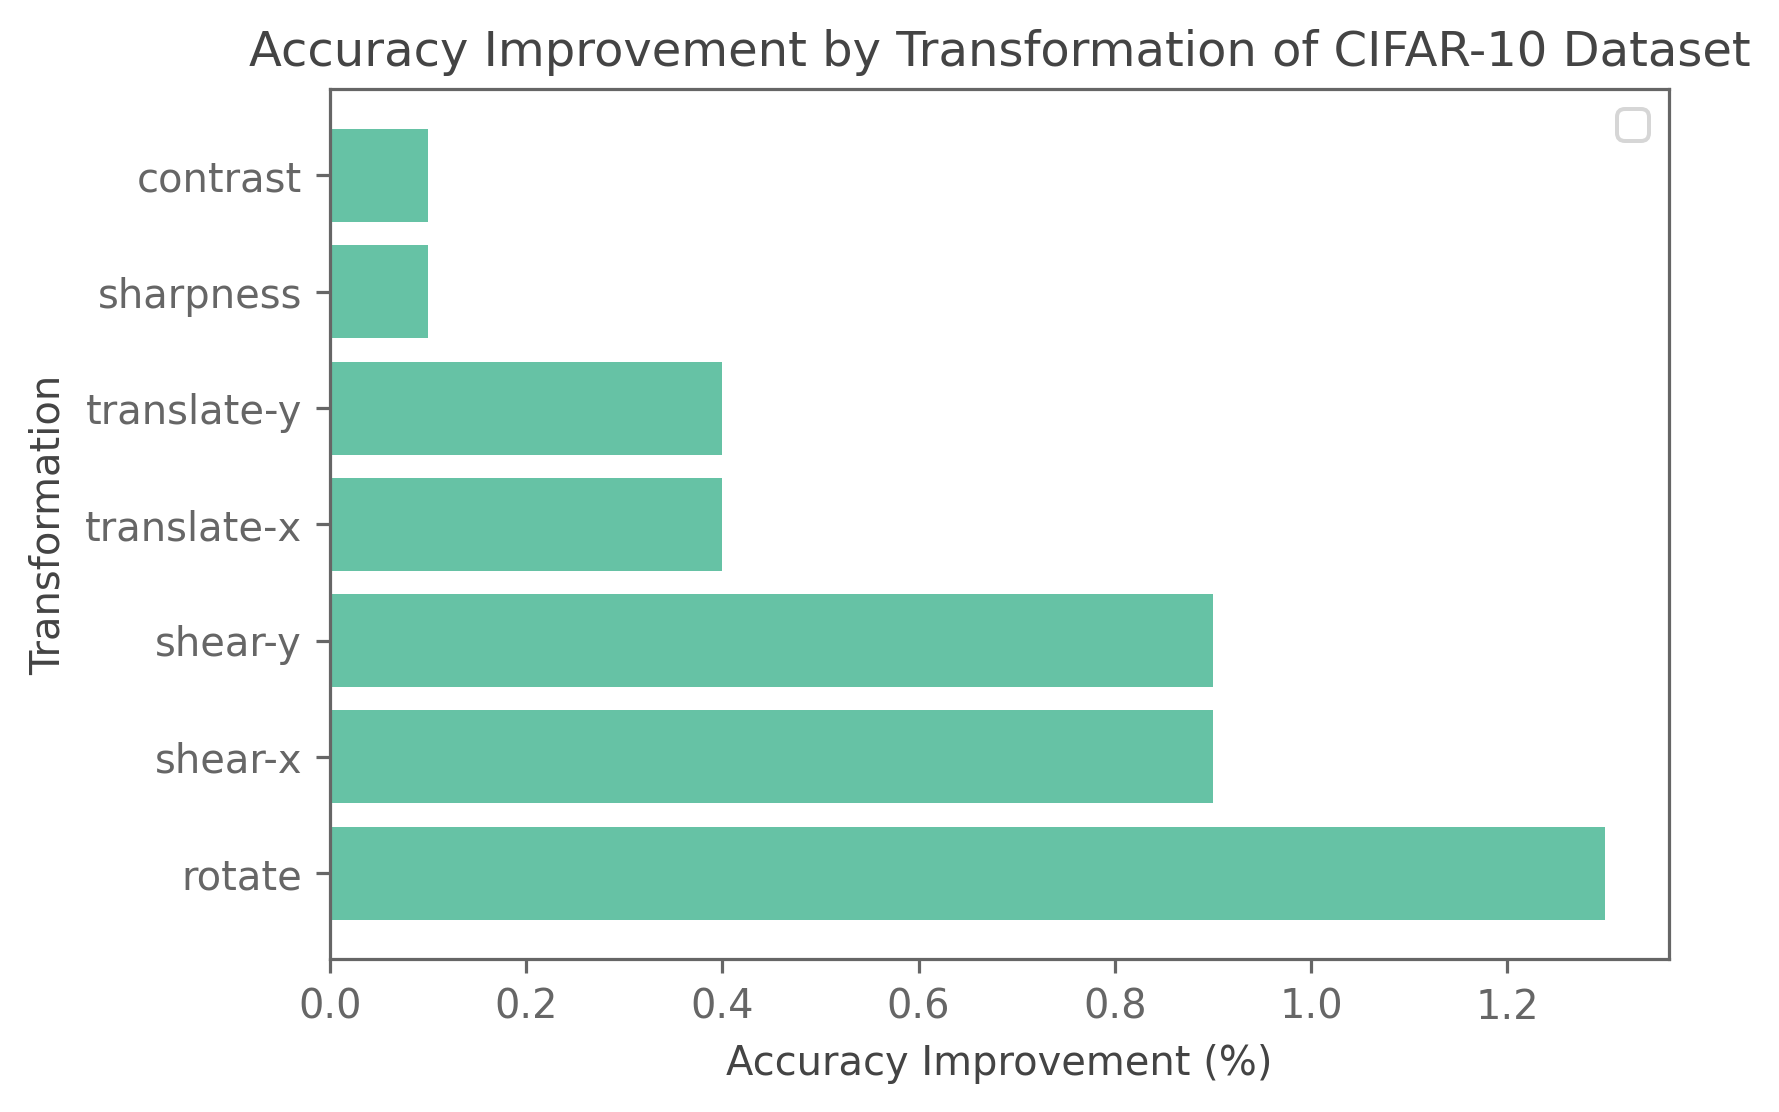

In [3]:
transormations = ['rotate', 'shear-x', 'shear-y', 'translate-x', 'translate-y', 'sharpness', 'contrast']
improvements = [1.3, 0.9, 0.9, 0.4, 0.4, 0.1, 0.1]

plt.barh(transormations, improvements)
axes = plt.gca()
axes.set_xlabel('Accuracy Improvement (%)')
axes.set_ylabel('Transformation')
axes.set_title('Accuracy Improvement by Transformation of CIFAR-10 Dataset')

axes.legend()
plt.show()

## Oxford Flowers [Chapter 3]

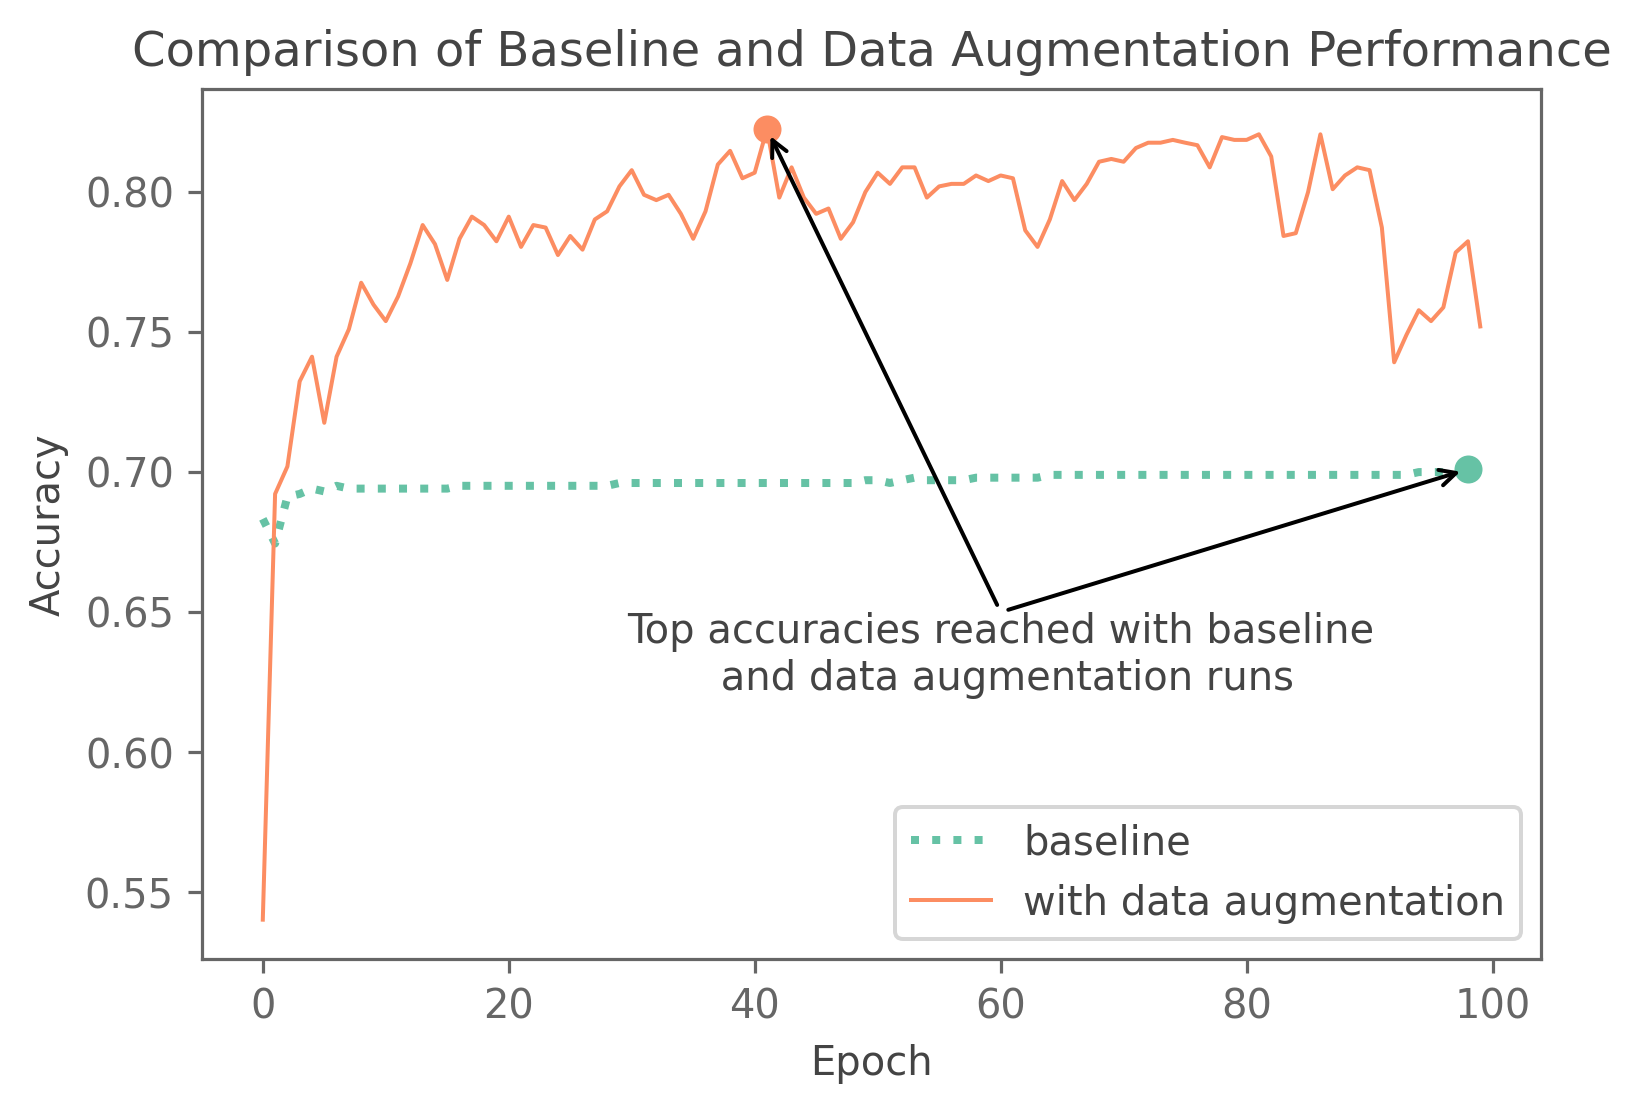

In [4]:
"""
Plot Graphs

Arguments:
    data: An array of values
    ax: The axis to plot on
    style: The style of the plot
    label: The label of the plot
    ls: The line style
    lw: The line width
    mark: The marker selection criteria
    annotation: The annotation configuration of the plot
"""
def plot(data, ax=None, style=None, label=None, ls=None, lw=None, mark=None, annotation=None):
    ax = ax or plt.gca()

    def annotate(x,y):
        text = annotation['text']
        xdelta = annotation['xdelta'] if 'xdelta' in annotation else 0
        ydelta = annotation['ydelta'] if 'ydelta' in annotation else 0
        align = annotation['align'] if 'align' in annotation else 'center'

        ax.annotate(
            text,
            xy=(x, y),
            xytext=(x+xdelta, y+ydelta),
            xycoords='data',
            horizontalalignment=align,
            arrowprops=dict(arrowstyle="->"),
        )

    def mark_fn():
        markx = np.argmax(data) if mark == 'max' else np.argmin(data)
        marky = max(data) if mark == 'max' else min(data)
        ax.scatter(markx, marky, zorder=2)
        annotate(markx, marky) if annotation else None

    style = style or '-'
    label = label or ''
    # print(lw)
    # ax.tick_params(axis='x', colors='black', labelweight=1)
    ax.plot(data, label=label, ls=ls, lw=lw) if ls else ax.plot(data, style, label=label, lw=lw)

    mark_fn() if mark else None

def annotate(data, ax=None, type='max', annotation=None):
    ax = ax or plt.gca()

    def annotate_fn(x, y, pos_x, pos_y):
        for (ix, iy) in zip(x, y):
            ax.annotate(
                '',
                xy=(ix, iy),
                xytext=(pos_x, pos_y),
                xycoords='data',
                arrowprops=dict(arrowstyle="->"),
            )
        
        halign = annotation.get('halign', 'center')
        valign = annotation.get('valign', 'bottom')
        ax.text(pos_x, pos_y, annotation['text'], ha=halign, va=valign)

    if type == 'max':
        marksx = np.argmax(data, axis=1)
        marksy = np.amax(data, axis=1)
    else:
        marksx = np.argmin(data)
        marksy = np.amax(data, axis=0)
    
    pos_x = annotation.get('pos_x', 0)
    pos_y = annotation.get('pos_y', 0)
    
    annotate_fn(marksx, marksy, pos_x, pos_y) if annotation else None
        

baseline = [0.683300,0.674500,0.691200,0.692200,0.694100,0.693100,0.695100,0.694100,0.694100,0.694100,0.694100,0.694100,0.694100,0.694100,0.694100,0.694100,0.695100,0.695100,0.695100,0.695100,0.695100,0.695100,0.695100,0.695100,0.695100,0.695100,0.695100,0.695100,0.695100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.696100,0.697100,0.697100,0.696100,0.697100,0.698000,0.697100,0.697100,0.697100,0.697100,0.698000,0.698000,0.698000,0.698000,0.698000,0.698000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.699000,0.700000,0.700000,0.700000,0.700000,0.701000,0.701000,]
augmented = [0.540200,0.692200,0.702000,0.732400,0.741200,0.717600,0.741200,0.751000,0.767600,0.759800,0.753900,0.762700,0.774500,0.788200,0.781400,0.768600,0.783300,0.791200,0.788200,0.782400,0.791200,0.780400,0.788200,0.787300,0.777500,0.784300,0.779400,0.790200,0.793100,0.802000,0.807800,0.799000,0.797100,0.799000,0.792200,0.783300,0.793100,0.809800,0.814700,0.804900,0.806900,0.822500,0.798000,0.808800,0.798000,0.792200,0.794100,0.783300,0.789200,0.800000,0.806900,0.802900,0.808800,0.808800,0.798000,0.802000,0.802900,0.802900,0.805900,0.803900,0.805900,0.804900,0.786300,0.780400,0.790200,0.803900,0.797100,0.802900,0.810800,0.811800,0.810800,0.815700,0.817600,0.817600,0.818600,0.817600,0.816700,0.808800,0.819600,0.818600,0.818600,0.820600,0.812700,0.784300,0.785300,0.800000,0.820600,0.801000,0.805900,0.808800,0.807800,0.787300,0.739200,0.749000,0.757800,0.753900,0.758800,0.778400,0.782400,0.752000,]

fig = plt.figure(facecolor='white')
# plot(baseline, label='baseline', linestyle='dotted', annotation=dict(text='Top Accuracy', ydelta=0.02, align='right'))
# plot(augmented, label='with data augmentation', style='--', annotation=dict(text='Top Accuracy', ydelta=-0.05))

plot(baseline, label='baseline', ls='dotted', lw=2, mark='max')
plot(augmented, label='with data augmentation', lw=1, mark='max')
annotate(
    np.array([baseline, augmented]),
    annotation=dict(text='Top accuracies reached with baseline\n and data augmentation runs', pos_x=60, pos_y=.65, halign='center', valign='top')
)

axes = plt.gca()
axes.set_xlabel('Epoch')
axes.set_ylabel('Accuracy')
axes.set_title('Comparison of Baseline and Data Augmentation Performance')
axes.legend()

plt.show()

## IMDB Review Sentiment Classification [Chapter 3]

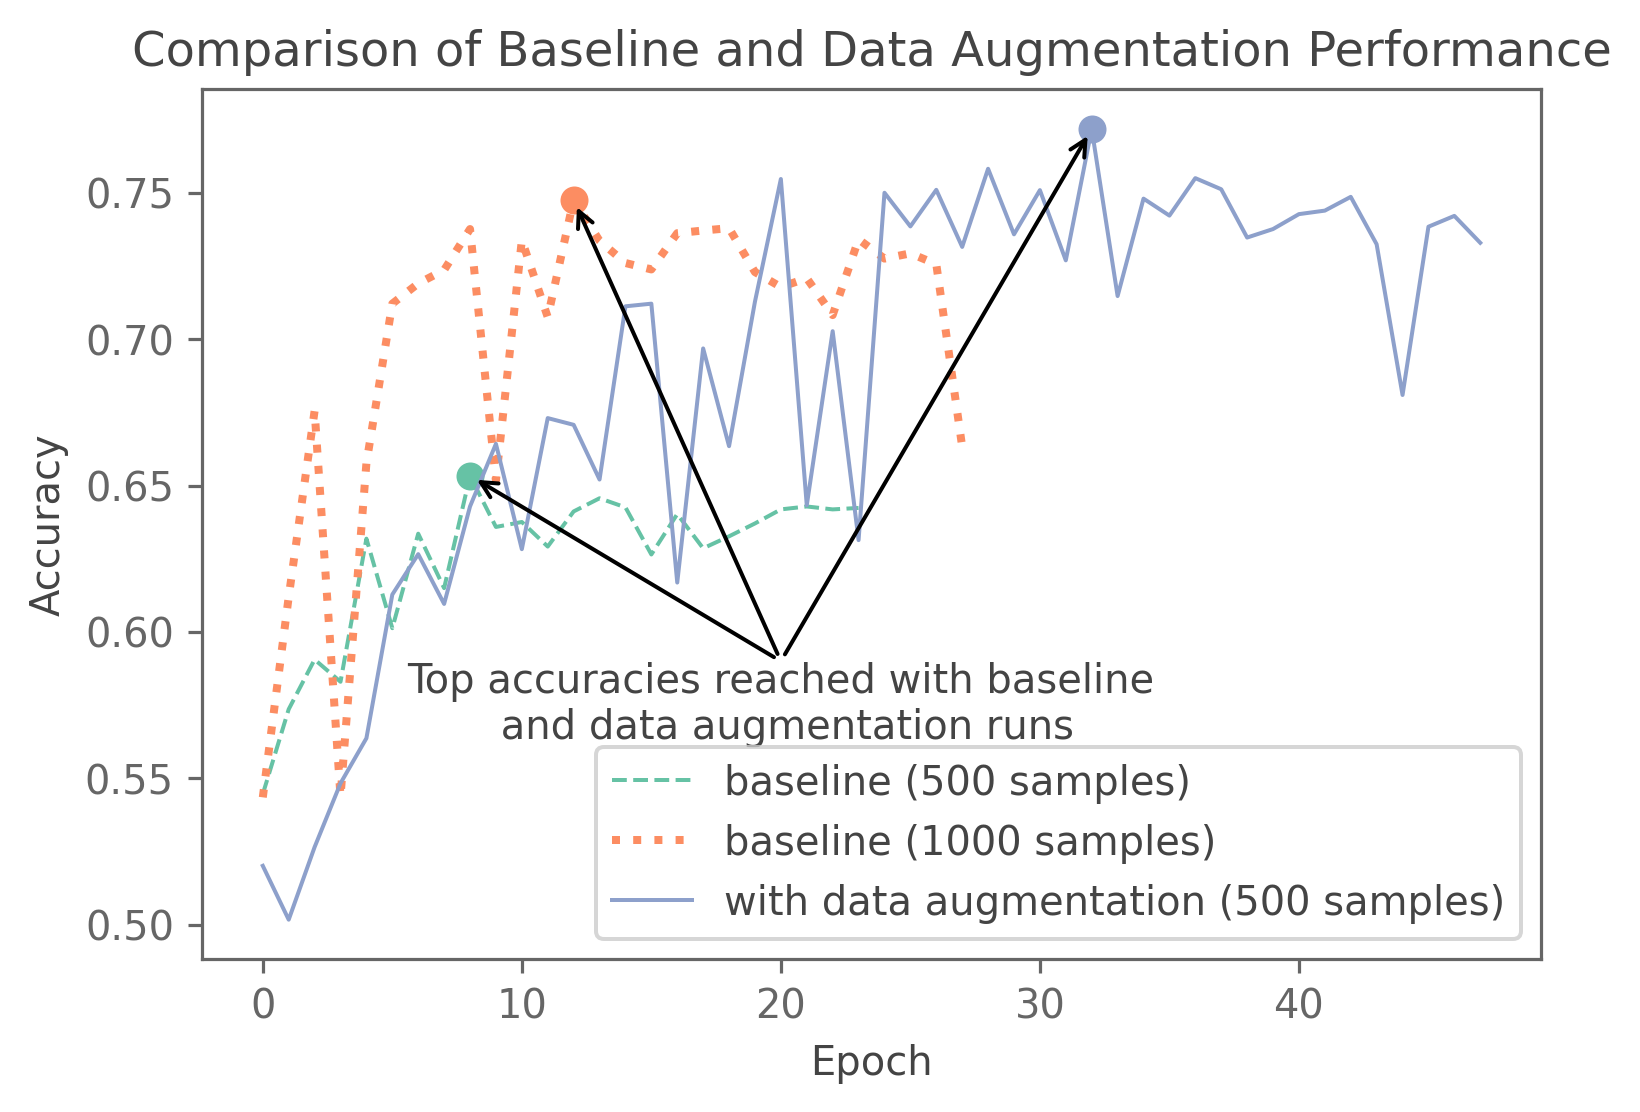

In [5]:
baseline500 = [0.544600,0.573600,0.590600,0.583000,0.631900,0.601300,0.633600,0.615000,0.653400,0.635900,0.637600,0.629200,0.641200,0.645700,0.642600,0.626500,0.640300,0.628600,0.632700,0.637100,0.641900,0.642900,0.641900,0.642400,]
nlpaug500 = [0.520100,0.501700,0.526500,0.548300,0.563700,0.612800,0.626600,0.609600,0.642900,0.664300,0.628300,0.673100,0.670800,0.652100,0.711300,0.712200,0.616900,0.696900,0.663500,0.712900,0.754800,0.643300,0.702800,0.631400,0.750100,0.738600,0.751100,0.731600,0.758300,0.735900,0.751000,0.727000,0.771900,0.714800,0.748100,0.742300,0.755100,0.751300,0.734800,0.737700,0.742800,0.744000,0.748700,0.732500,0.681000,0.738500,0.742200,0.733000,]
baseline1000 = [0.543500,0.612000,0.675600,0.543800,0.657700,0.712200,0.719100,0.723700,0.737700,0.651700,0.733900,0.707600,0.747700,0.733700,0.726100,0.723900,0.736300,0.737200,0.738000,0.723000,0.717900,0.720900,0.708300,0.734200,0.727600,0.729400,0.725700,0.663300,]

fig = plt.figure(facecolor='white')
plot(baseline500, label='baseline (500 samples)', ls='--', lw=1, mark='max')
plot(baseline1000, label='baseline (1000 samples)', ls='dotted', lw=2, mark='max')
plot(nlpaug500, label='with data augmentation (500 samples)', lw=1, mark='max')

def fill(x, n=100):
    def _fill(x):
        extn_len = n - len(x)
        return x + [0]*extn_len
    
    return x if len(x) == n else _fill(x)

annotate(
    np.array([fill(baseline500), fill(nlpaug500), fill(baseline1000)]),
    annotation=dict(text='Top accuracies reached with baseline\n and data augmentation runs', pos_x=20, pos_y=.59, halign='center', valign='top')
)

axes = plt.gca()
axes.set_xlabel('Epoch')
axes.set_ylabel('Accuracy')
axes.set_title('Comparison of Baseline and Data Augmentation Performance')
axes.legend()

plt.show()

## Distillation Temperatures [Chapter 3]

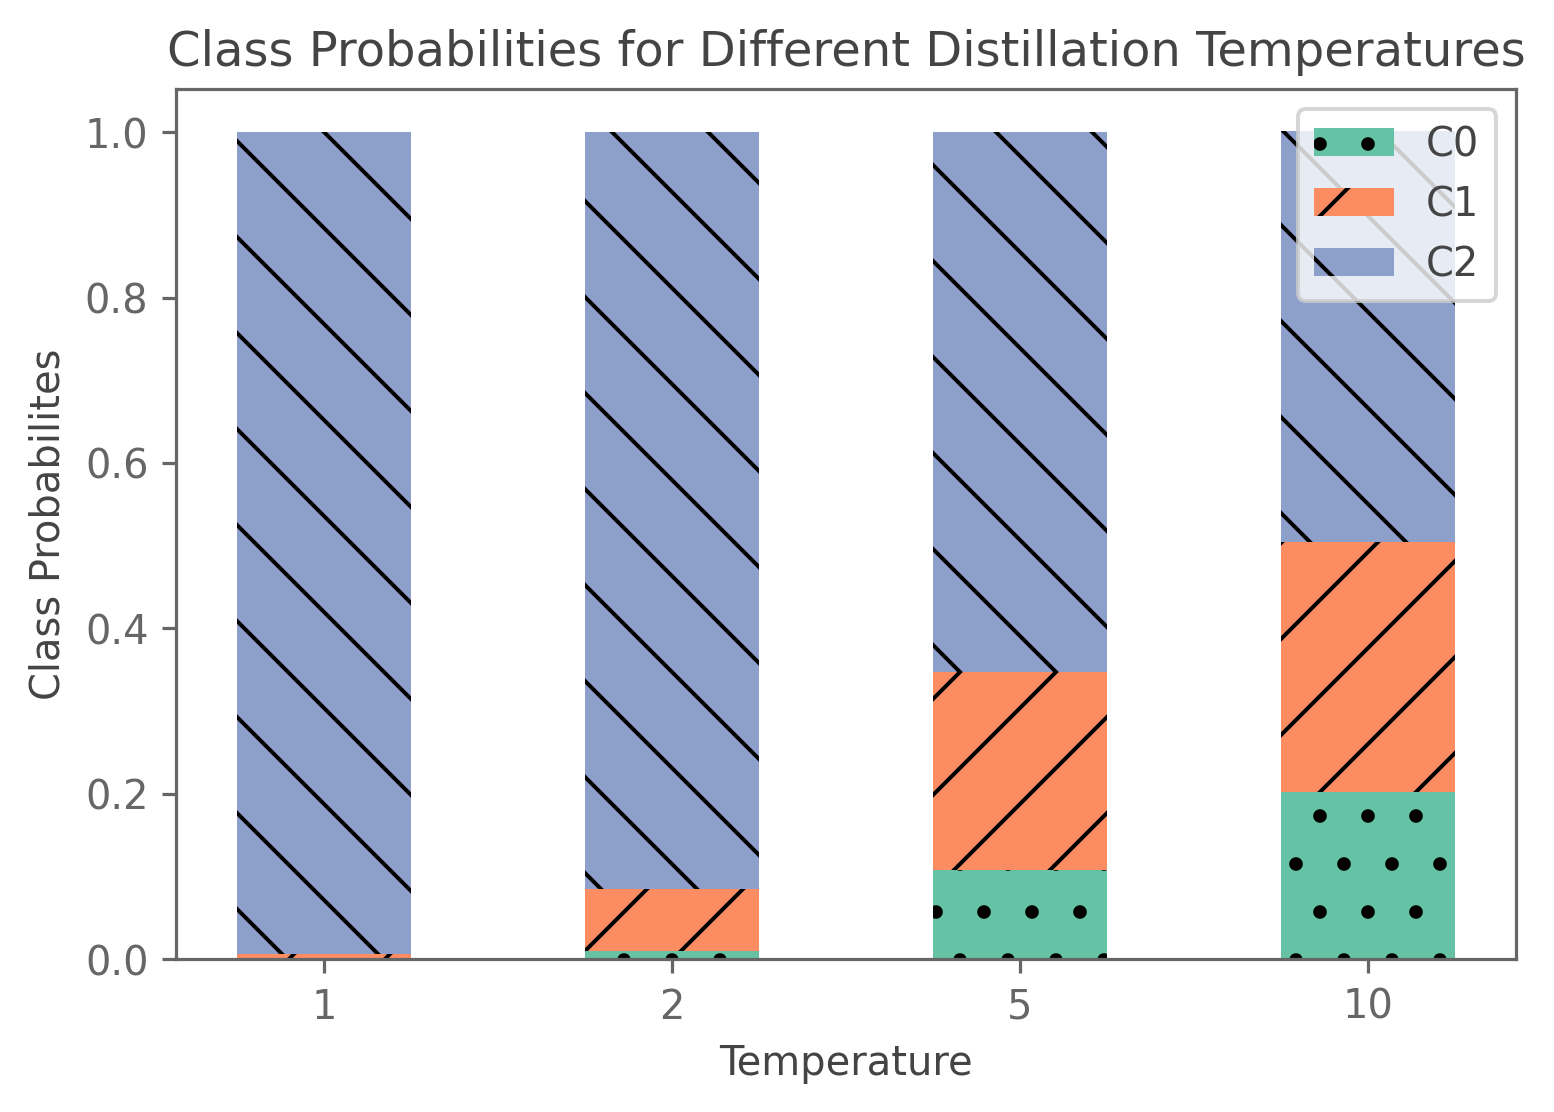

In [6]:
classes = ['C0', 'C1', 'C2']
temperatures = ['1', '2', '5', '10']
c0 = [1.22e-4, 0.0102, 0.1078, 0.202]
c1 = [6.69e-3, 0.0751, 0.2399, 0.303]
c2 = [0.9931, 0.9148, 0.6522, 0.4967]

fig = plt.figure(facecolor='white')
color=(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

# props = dict(width = 0.5, ls='-', edgecolor='black')
props = dict(width = 0.5, ls='-')


anchor = plt.bar(temperatures, c0, label='C0', hatch='.', **props)
plt.bar(temperatures, c1, bottom=c0, label='C1', hatch='/', **props)
plt.bar(temperatures, c2, bottom=np.array(c0) + np.array(c1), label='C2', hatch='\\', **props)

axes = plt.gca()
axes.set_xlabel('Temperature')
axes.set_ylabel('Class Probabilites')
axes.set_title('Class Probabilities for Different Distillation Temperatures')

axes.legend()
plt.show()


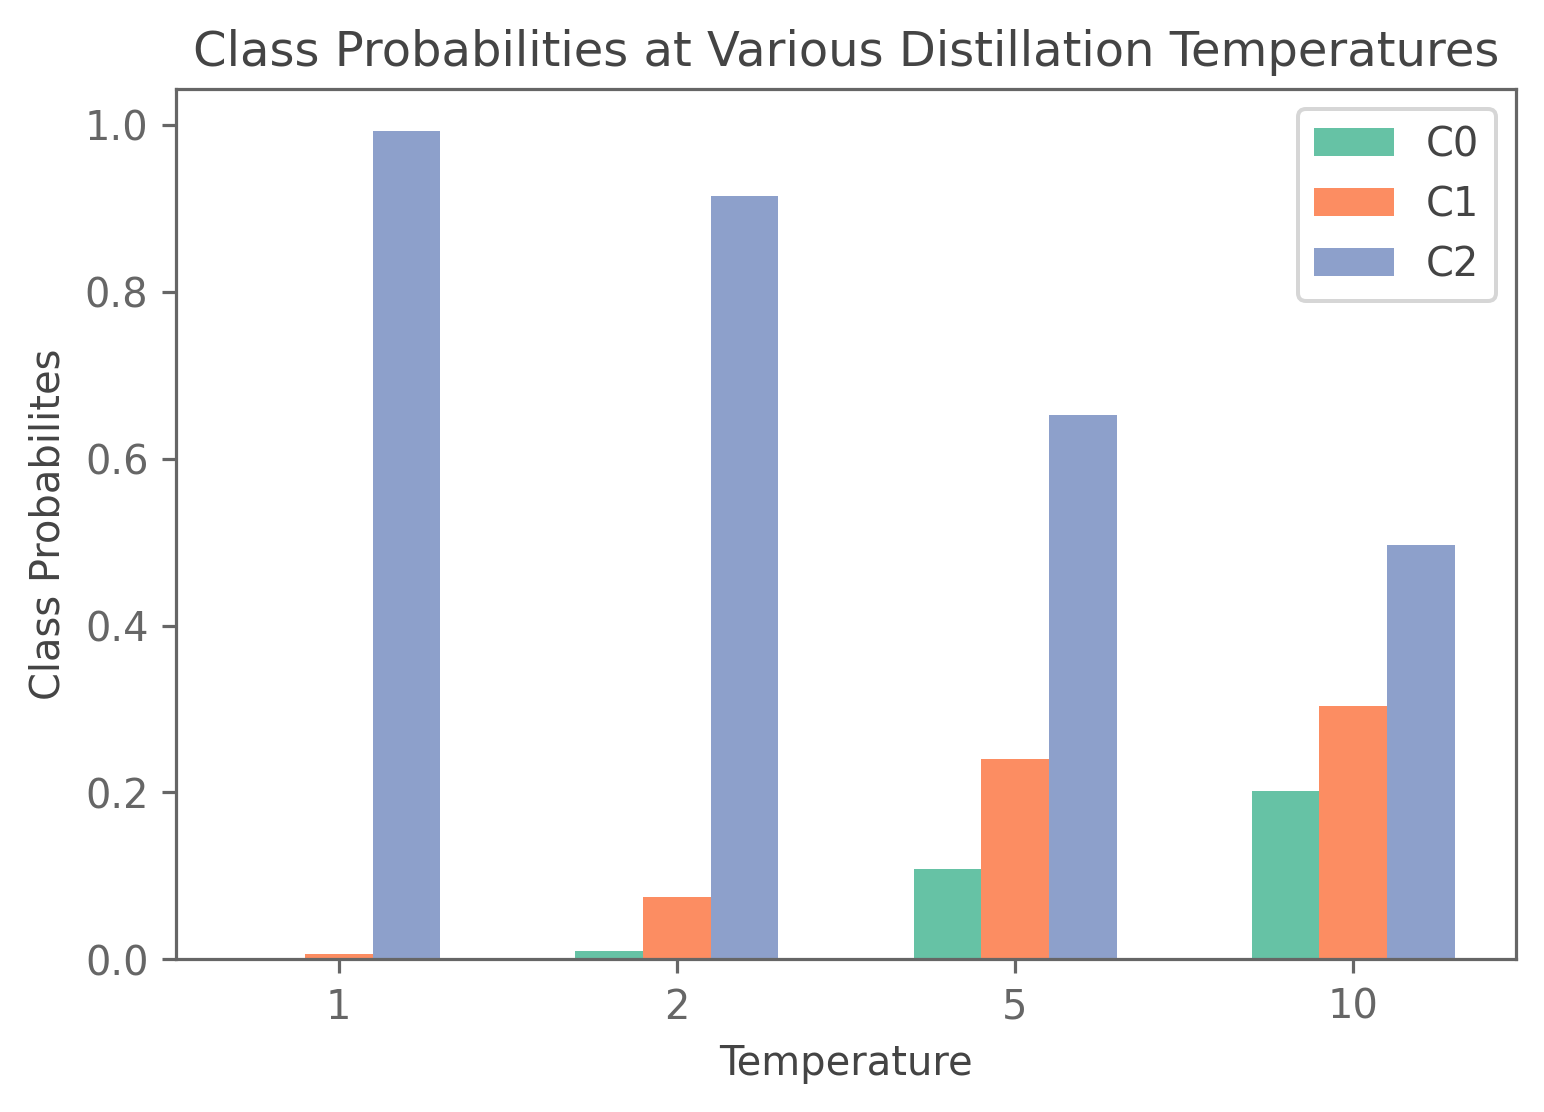

In [7]:
# ax = plt.subplot(111)
# ax.bar(x-0.2, y, width=0.2, color='b', align='center')
# ax.bar(x, z, width=0.2, color='g', align='center')
# ax.bar(x+0.2, k, width=0.2, color='r', align='center')

fig = plt.figure(facecolor='white')
xs = np.arange(len(temperatures))

plt.bar(xs-.2, c0, label='C0', width=.2, align='center')
plt.bar(xs, c1, label='C1', width=.2)
plt.bar(xs+.2, c2, label='C2', width=.2)

axes = plt.gca()
axes.set_xticks([0, 1, 2, 3])
axes.set_xticklabels(temperatures)
axes.set_xlabel('Temperature')
axes.set_ylabel('Class Probabilites')
axes.set_title('Class Probabilities at Various Distillation Temperatures')
# axes.grid(lw = .25, xdata=[1], ydata=[0])

axes.legend()
plt.show()

Text(0.5, 0.98, 'Class Probabilities at Various Distillation Temperatures')

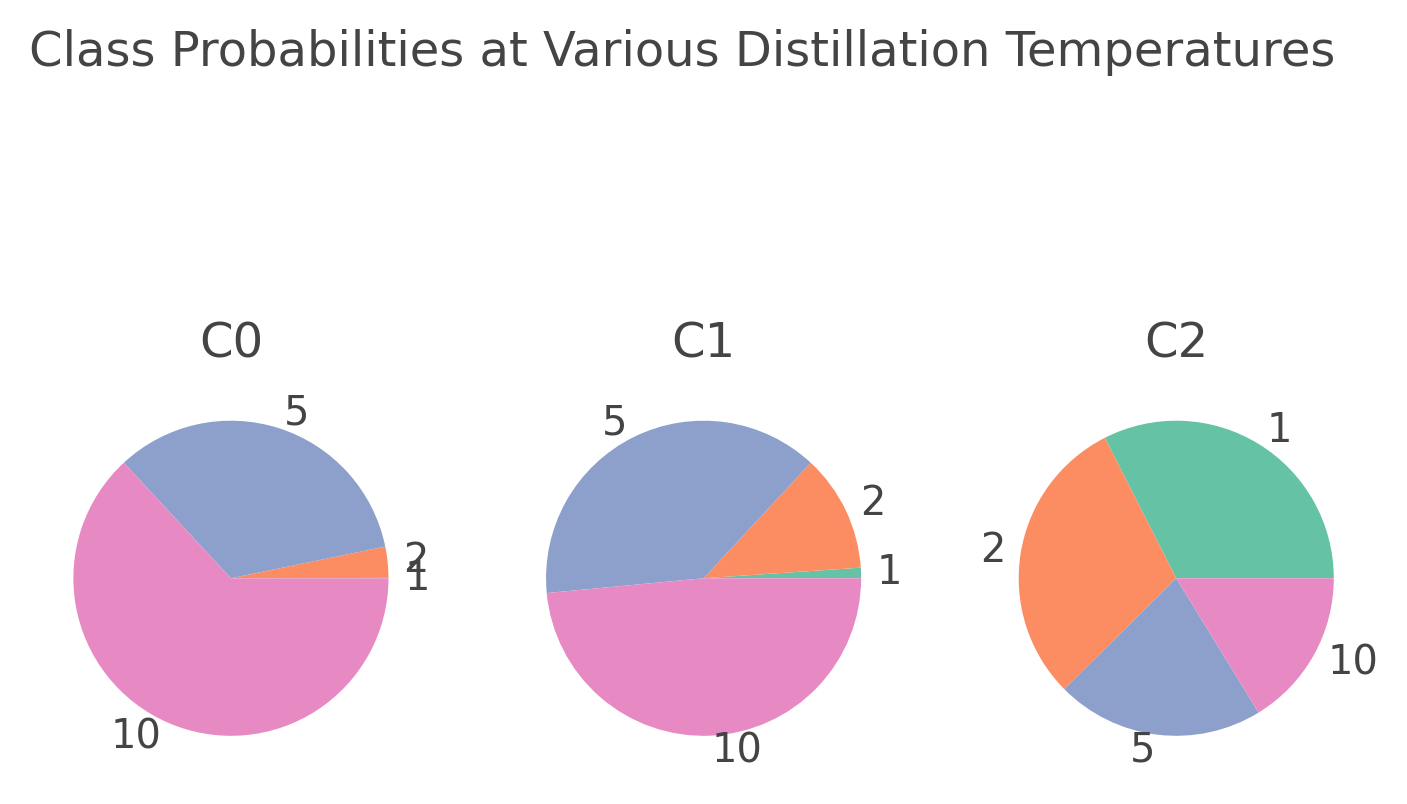

In [8]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
fig.set_facecolor('white')

ax0.pie(c0, labels=temperatures)
ax1.pie(c1, labels=temperatures)
ax2.pie(c2, labels=temperatures)

# ax0.set_xlabel('Temperature')
# ax0.set_ylabel('Class Probabilites')
ax0.set_title('C0')
ax1.set_title('C1')
ax2.set_title('C2')
fig.suptitle('Class Probabilities at Various Distillation Temperatures')




# Number of centroids v/s Compression ratio [Chapter 5]

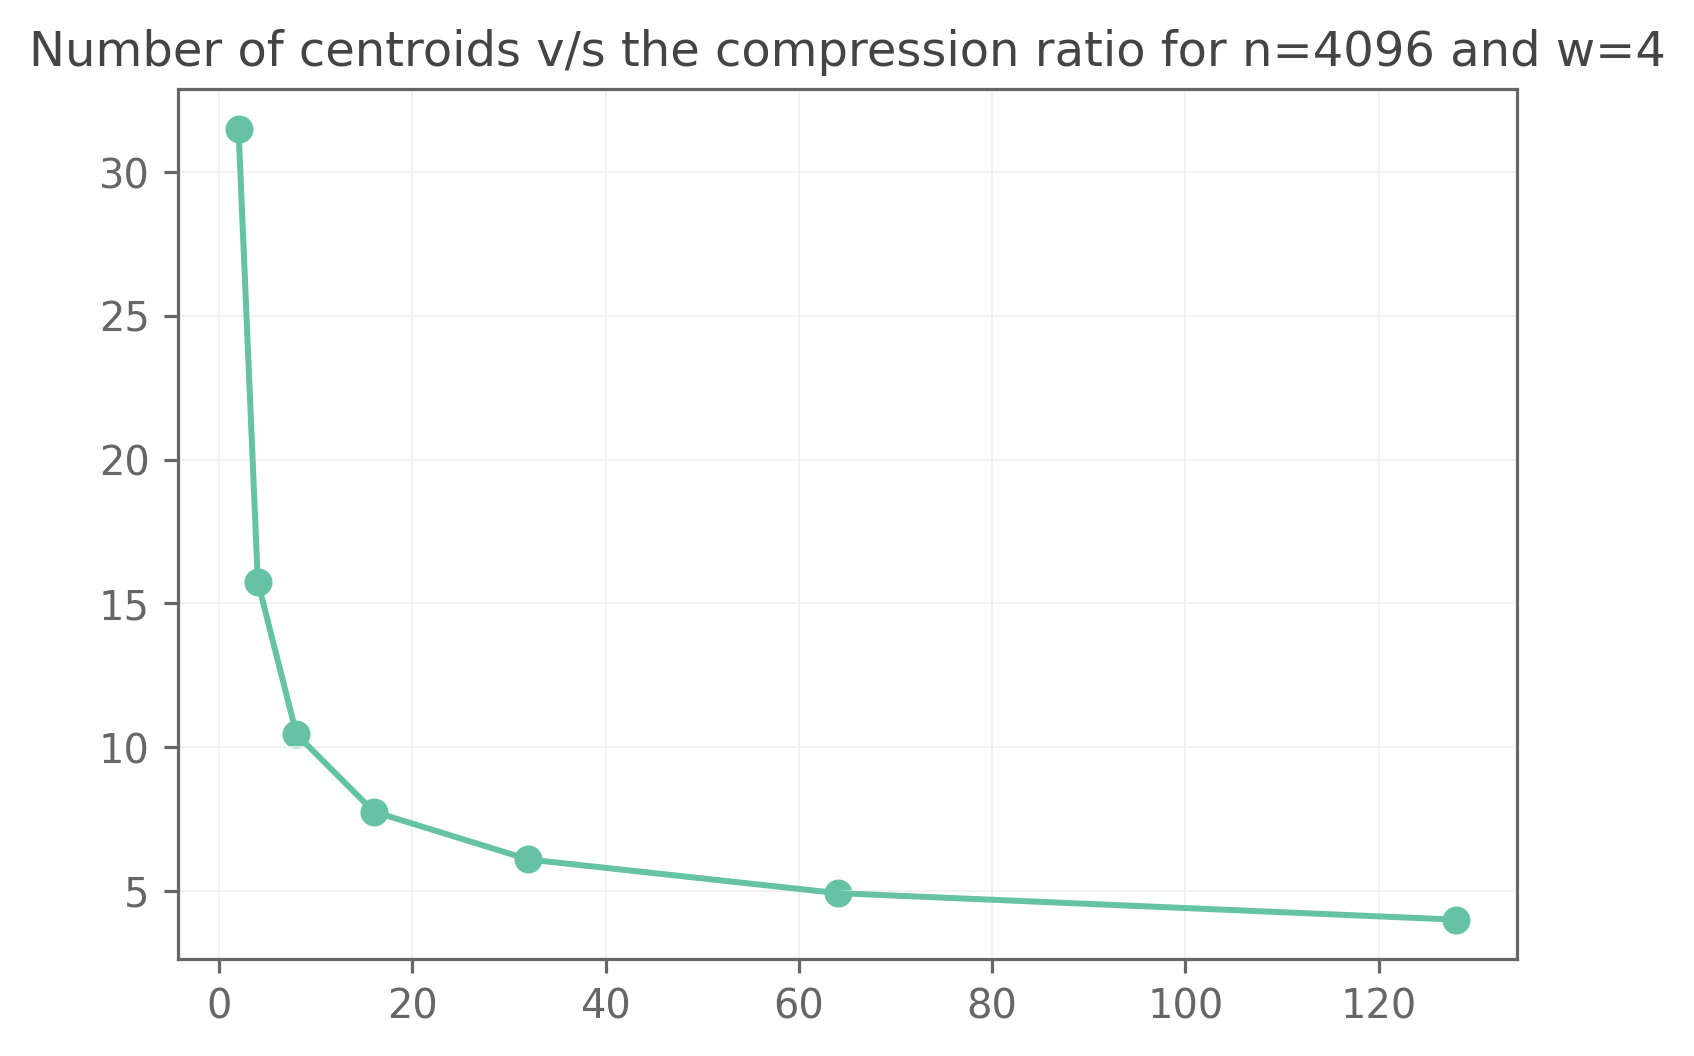

In [20]:
import numpy as np

tensor_size = 64*64
number_of_centroids = 2**np.array(list(range(1, 8)))
compression_ratios = (32*tensor_size)/(32*number_of_centroids + tensor_size*np.log2(number_of_centroids))
# compression_ratios

plt.plot(number_of_centroids.tolist(), compression_ratios.tolist())
plt.scatter(number_of_centroids.tolist(), compression_ratios.tolist())
plt.title('Number of centroids v/s the compression ratio for n=4096 and w=4')
plt.grid()